# TED Talks Web Scrapped

In [139]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import csv
import sys

from collections import defaultdict, Counter

%matplotlib inline

sb.set_style('darkgrid')
sb.set()

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)


In [140]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\TED Talks Web-scraped dataset\talks_info.csv")
df.head(2)

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA


In [141]:
df.shape

(5631, 16)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 5631 non-null   int64 
 1   duration            5631 non-null   int64 
 2   event               5630 non-null   object
 3   likes               5631 non-null   object
 4   page_url            5631 non-null   object
 5   published_date      5631 non-null   object
 6   recorded_date       5629 non-null   object
 7   related_videos      5631 non-null   object
 8   speakers            5631 non-null   object
 9   subtitle_languages  5631 non-null   object
 10  summary             5631 non-null   object
 11  title               5631 non-null   object
 12  topics              5631 non-null   object
 13  transcript          4983 non-null   object
 14  views               5631 non-null   int64 
 15  youtube_video_code  5462 non-null   object
dtypes: int64(3), object(13)


In [143]:
round(df.describe())

,_id,duration,views
count,5631.0,5631.0,5631.0
mean,25687.0,708.0,2130394.0
std,29649.0,521.0,3679481.0
min,1.0,60.0,587.0
25%,1642.0,355.0,678154.0
50%,9807.0,682.0,1392074.0
75%,50010.0,926.0,2182300.0
max,95714.0,20404.0,73389142.0


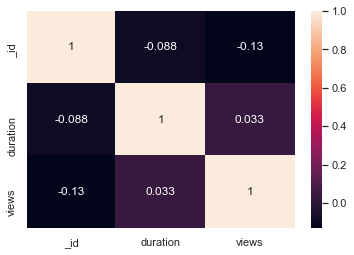

In [144]:
sb.heatmap(df.corr(), annot = True)

In [145]:
df.isnull().sum()

_id                     0
duration                0
event                   1
likes                   0
page_url                0
published_date          0
recorded_date           2
related_videos          0
speakers                0
subtitle_languages      0
summary                 0
title                   0
topics                  0
transcript            648
views                   0
youtube_video_code    169
dtype: int64

In [146]:
df.drop(columns = ['event', 'page_url', 'youtube_video_code'], inplace = True)
df.head(2)

,_id,duration,likes,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views
0,21,992,17K,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115
1,1,957,110K,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801


In [147]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [148]:
df['recorded_date'] = pd.to_datetime(df['recorded_date'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   _id                 5631 non-null   int64              
 1   duration            5631 non-null   int64              
 2   likes               5631 non-null   object             
 3   published_date      5631 non-null   datetime64[ns, UTC]
 4   recorded_date       5629 non-null   datetime64[ns]     
 5   related_videos      5631 non-null   object             
 6   speakers            5631 non-null   object             
 7   subtitle_languages  5631 non-null   object             
 8   summary             5631 non-null   object             
 9   title               5631 non-null   object             
 10  topics              5631 non-null   object             
 11  transcript          4983 non-null   object             
 12  views               5631 non-null 

In [150]:
df['likes'] = df['likes'].replace('K', '000', inplace = True)
df['likes'] = df['likes'].replace('M', '00000', inplace = True)
df['likes'] = pd.to_numeric(df['likes'])

In [151]:
df.head()

,_id,duration,likes,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views
0,21,992,NaN,2006-08-25 00:11:00+00:00,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115
1,1,957,NaN,2006-06-27 00:11:00+00:00,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801
2,7,1266,NaN,2006-06-27 00:11:00+00:00,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487
3,47,1126,NaN,2006-09-12 00:11:00+00:00,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257
4,55,1524,NaN,2006-07-25 00:11:00+00:00,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757
